In [1]:
import numpy as np
import pandas as pd
#dataset import
df = pd.read_csv("../Data/data_6_nodes_yen.csv") #You need to change #directory accordingly
df.head()

,"X(1, 2)","X(1, 4)","X(1, 5)","X(2, 3)","X(2, 6)","X(3, 6)","X(4, 5)","X(5, 6)","Y1(1, 2)","Y1(1, 4)",...,"Y3(4, 5)","Y3(5, 6)","Y4(1, 2)","Y4(1, 4)","Y4(1, 5)","Y4(2, 3)","Y4(2, 6)","Y4(3, 6)","Y4(4, 5)","Y4(5, 6)"
0,90,80,40,40,10,20,20,40,0,0,...,1,1,1,0,0,1,0,1,0,0
1,40,20,80,80,30,70,80,20,1,0,...,1,1,1,0,0,1,0,1,0,0
2,70,20,80,30,60,70,80,90,1,0,...,0,0,0,1,0,0,0,0,1,1
3,80,40,50,30,30,80,90,60,0,0,...,1,1,1,0,0,1,0,1,0,0
4,20,30,30,20,60,70,20,10,0,0,...,0,0,1,0,0,1,0,1,0,0


In [2]:
edges = [[1, 2], [1, 4], [1, 5], [2, 3], [2, 6], [3, 6], [4, 5], [5, 6]]

In [3]:
number_edges = 8
number_steps = 3
start_node = 1
end_node = 6

In [4]:
X = df.iloc[:30000,:number_edges].values
y = df.iloc[:30000,number_edges:(number_edges*(number_steps+1))].values

In [5]:
X.shape

(30000, 8)

In [6]:
y.shape

(30000, 24)

In [7]:
from sklearn.model_selection import train_test_split
X1,X2,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [8]:
X2[1]

array([50, 80, 40, 30, 20, 50, 40, 30], dtype=int64)

In [9]:
y_test[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X1)
X_test= sc.fit_transform(X2)

In [11]:
X_train = np.repeat(X_train[:, np.newaxis, : ], number_steps, axis=1)
X_train.shape

(27000, 3, 8)

In [12]:
X_test = np.repeat(X_test[:, np.newaxis, : ], number_steps, axis=1)
X_test.shape

(3000, 3, 8)

In [13]:
y_train[0]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [14]:
y_train_2 = np.reshape(y_train,(y_train.shape[0], number_steps, number_edges))
y_train_2.shape

(27000, 3, 8)

In [15]:
y_train_2[0]

array([[1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [16]:
y_test_2 = np.reshape(y_test,(y_test.shape[0], number_steps, number_edges))
y_test_2.shape

(3000, 3, 8)

In [17]:
X2[1,:]

array([50, 80, 40, 30, 20, 50, 40, 30], dtype=int64)

In [18]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,TimeDistributed,LSTM
# Neural network
model = Sequential()
model.add(LSTM(16, input_shape=(number_steps, number_edges), 
                    return_sequences=True))
model.add(TimeDistributed(Dense(number_edges, activation='sigmoid')))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 16)             1600      
                                                                 
 time_distributed (TimeDistr  (None, 3, 8)             136       
 ibuted)                                                         
                                                                 
Total params: 1,736
Trainable params: 1,736
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='BinaryCrossentropy', optimizer='sgd')

In [21]:
history = model.fit(X_train, y_train_2, epochs=1000, batch_size=64)

Epoch 1/1000
422/422 [==============================] - 3s 3ms/step - loss: 0.6774
Epoch 2/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.6492
Epoch 3/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.6280
Epoch 4/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.6118
Epoch 5/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5995
Epoch 6/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5898
Epoch 7/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5822
Epoch 8/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5761
Epoch 9/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5712
Epoch 10/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5671
Epoch 11/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5636
Epoch 12/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.5606
E

422/422 [==============================] - 1s 3ms/step - loss: 0.4927
Epoch 99/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4924
Epoch 100/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4922
Epoch 101/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4919
Epoch 102/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4916
Epoch 103/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4913
Epoch 104/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4911
Epoch 105/1000
422/422 [==============================] - 2s 5ms/step - loss: 0.4908
Epoch 106/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.4905
Epoch 107/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4902
Epoch 108/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4900
Epoch 109/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4

422/422 [==============================] - 1s 3ms/step - loss: 0.4636
Epoch 195/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4633
Epoch 196/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4629
Epoch 197/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4626
Epoch 198/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4622
Epoch 199/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4619
Epoch 200/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4615
Epoch 201/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4611
Epoch 202/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4608
Epoch 203/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4604
Epoch 204/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4601
Epoch 205/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.

422/422 [==============================] - 1s 3ms/step - loss: 0.4171
Epoch 291/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4164
Epoch 292/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4157
Epoch 293/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4149
Epoch 294/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4141
Epoch 295/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4134
Epoch 296/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4126
Epoch 297/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4118
Epoch 298/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4110
Epoch 299/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4102
Epoch 300/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4094
Epoch 301/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.

422/422 [==============================] - 1s 3ms/step - loss: 0.2804
Epoch 387/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2787
Epoch 388/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2771
Epoch 389/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2756
Epoch 390/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2741
Epoch 391/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2725
Epoch 392/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2711
Epoch 393/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2696
Epoch 394/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2682
Epoch 395/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2668
Epoch 396/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.2654
Epoch 397/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.

422/422 [==============================] - 1s 3ms/step - loss: 0.1906
Epoch 483/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1900
Epoch 484/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1894
Epoch 485/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1888
Epoch 486/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1882
Epoch 487/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1877
Epoch 488/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1871
Epoch 489/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1865
Epoch 490/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1859
Epoch 491/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1853
Epoch 492/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1848
Epoch 493/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.

422/422 [==============================] - 1s 3ms/step - loss: 0.1458
Epoch 579/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1454
Epoch 580/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1450
Epoch 581/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1447
Epoch 582/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1443
Epoch 583/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1439
Epoch 584/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1436
Epoch 585/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1432
Epoch 586/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.1428
Epoch 587/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.1425
Epoch 588/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.1421
Epoch 589/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.

422/422 [==============================] - 1s 3ms/step - loss: 0.1168
Epoch 675/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1166
Epoch 676/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1163
Epoch 677/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1161
Epoch 678/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1158
Epoch 679/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1156
Epoch 680/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1154
Epoch 681/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1151
Epoch 682/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1149
Epoch 683/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1147
Epoch 684/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.1144
Epoch 685/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.

422/422 [==============================] - 1s 3ms/step - loss: 0.0975
Epoch 771/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0974
Epoch 772/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0972
Epoch 773/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0970
Epoch 774/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0969
Epoch 775/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0967
Epoch 776/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0965
Epoch 777/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0964
Epoch 778/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0962
Epoch 779/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0961
Epoch 780/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0959
Epoch 781/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.

422/422 [==============================] - 1s 2ms/step - loss: 0.0838
Epoch 867/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0837
Epoch 868/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0836
Epoch 869/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0835
Epoch 870/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0834
Epoch 871/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0832
Epoch 872/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0831
Epoch 873/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0830
Epoch 874/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0829
Epoch 875/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0828
Epoch 876/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0826
Epoch 877/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.

422/422 [==============================] - 1s 2ms/step - loss: 0.0734
Epoch 963/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0733
Epoch 964/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0732
Epoch 965/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.0731
Epoch 966/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.0730
Epoch 967/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0729
Epoch 968/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0728
Epoch 969/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0728
Epoch 970/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0727
Epoch 971/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0726
Epoch 972/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.0725
Epoch 973/1000
422/422 [==============================] - 1s 2ms/step - loss: 0.

In [22]:
len(model.layers)

2

In [23]:
pred=model.predict(X_train)

844/844 [==============================] - 1s 1ms/step


In [24]:
pred.shape

(27000, 3, 8)

In [25]:
pred[0]

array([[5.80413878e-01, 3.94989620e-04, 4.84424621e-01, 2.90128864e-05,
        9.09482360e-01, 2.63925049e-05, 4.96673281e-04, 4.25956547e-01],
       [1.02986570e-03, 3.92918242e-03, 9.73538935e-01, 8.59893476e-07,
        4.51599620e-02, 6.96502582e-07, 4.78290580e-03, 9.98937130e-01],
       [4.83449607e-04, 9.98706579e-01, 3.35762789e-03, 5.09025063e-04,
        1.14924616e-04, 3.44114233e-04, 9.99014914e-01, 9.99489367e-01]],
      dtype=float32)

In [26]:
y_train_2[0]

array([[1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [27]:
import copy
def cost_path(x,y):
    cost = 0
    path = []
    for i in range(number_edges):
        if y[i]==1:
            path.append(edges[i])
            cost+= x[i]
    if(len(path)!=0):
        path_2 = copy.deepcopy(path)
        path_nodes = [start_node]
        if(path[0][0]!=start_node):
            cost = 0
        else:
            path_nodes.append(path[0][1])
            del path_2[0]
            condition = True
            while(len(path_2)!=0 and condition):
                condition = False
                for i in range(len(path_2)):
                    if(path_nodes[-1] in path_2[i]):
                        path_2[i].remove(path_nodes[-1])
                        path_nodes.append(path_2[i][0])
                        path_2.pop(i)
                        condition = True
                        break
        if(path_nodes[-1]!=end_node or len(path_2)!=0):
            cost = 0
    else:
        cost = 0
    return cost

In [28]:
cost_path(X1[1],y_train[1])

100

In [29]:
accuracy = np.zeros(number_steps+1)
for i in range(pred.shape[0]):
    condition_1 = True
    for t in range(number_steps):
        output = copy.deepcopy(pred[i][t])
        condition_2 = True
        for j in range(len(output)):
            output[j] = round(output[j])
        if(cost_path(X1[i],output) != cost_path(X1[i],y_train_2[i][t])):
            condition_2 = False
            condition_1 = False
        if condition_2:
            accuracy[t] += 1
    if condition_1:
        accuracy[number_steps] += 1
accuracy = np.round(accuracy / pred.shape[0] * 100,2)
accuracy

array([90.74, 87.14, 92.96, 79.64])

In [30]:
pred_test=model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [31]:
accuracy_test = np.zeros(number_steps+1)
for i in range(pred_test.shape[0]):
    condition_1 = True
    for t in range(number_steps):
        output = copy.deepcopy(pred_test[i][t])
        condition_2 = True
        for j in range(len(output)):
            output[j] = round(output[j])
        if(cost_path(X1[i],output) != cost_path(X1[i],y_test_2[i][t])):
            condition_2 = False
            condition_1 = False
        if condition_2:
            accuracy_test[t] += 1
    if condition_1:
        accuracy_test[number_steps] += 1
accuracy_test = np.round(accuracy_test / pred_test.shape[0] * 100,2)
accuracy_test

array([90.03, 86.4 , 91.7 , 78.1 ])

In [32]:
model.summary()
print(accuracy)
print(accuracy_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 16)             1600      
                                                                 
 time_distributed (TimeDistr  (None, 3, 8)             136       
 ibuted)                                                         
                                                                 
Total params: 1,736
Trainable params: 1,736
Non-trainable params: 0
_________________________________________________________________
[90.74 87.14 92.96 79.64]
[90.03 86.4  91.7  78.1 ]


In [33]:
model.evaluate(X_train, y_train_2)

844/844 [==============================] - 2s 1ms/step - loss: 0.0698


0.06976877152919769

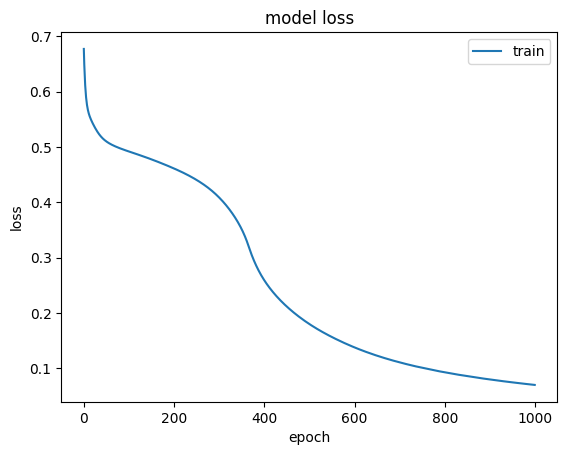

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()